<a href="https://colab.research.google.com/github/piaseckazaneta/CV/blob/master/Geopandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas

In [1]:
import geopandas as gpd

In [2]:
import pandas as pd

In [6]:
# Data for five large global cities (one from each continent)
data = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 5312163],  # Approximate populations
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.8688],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]
}

In [7]:
cities_df =pd.DataFrame(data)

In [10]:
gdf = gpd.GeoDataFrame(
    cities_df,
    geometry=gdp.points_from_xy(
        cities_df['Longitude'],
        cities_df['Latitude']
    )
)

In [11]:
gdf.geometry

,geometry
0,POINT (-74.006 40.7128)
1,POINT (-46.6333 -23.5505)
2,POINT (139.6917 35.6895)
3,POINT (3.3792 6.5244)
4,POINT (151.2093 -33.8688)


In [12]:
gdf['geometry']

,geometry
0,POINT (-74.006 40.7128)
1,POINT (-46.6333 -23.5505)
2,POINT (139.6917 35.6895)
3,POINT (3.3792 6.5244)
4,POINT (151.2093 -33.8688)


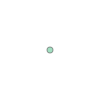

In [13]:
gdf['geometry'][0]

In [15]:
type(gdf['geometry'][0])
#shapely library allows to work with geometric objects

shapely.geometry.point.Point

Polygons

In [3]:
wisconsin = 'POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87.1477 43.3721,-87.1230 43.6838,-86.9911 44.1694,-86.8579 44.4828,-86.6876 44.8792,-86.2523 45.2343,-86.7535 45.4418,-87.1024 45.4438,-87.1724 45.3531,-87.3193 45.2401,-87.4100 45.1995,-87.4443 45.0784,-87.6379 45.0987,-87.6956 45.2217,-87.6462 45.3367,-87.6956 45.3869,-87.8549 45.3425,-87.7945 45.4813,-87.7945 45.5679,-87.7876 45.6764,-87.9936 45.7934,-88.1145 45.8077,-88.0733 45.8728,-88.1982 45.9521,-88.5498 46.0122,-88.7036 45.9970,-88.8451 46.0380,-89.0909 46.1389,-90.1195 46.3412,-90.4147 46.5664,-89.9615 47.2876,-90.6578 47.3100,-92.0352 46.7079,-92.2948 46.5928,-92.2975 46.0761,-92.3579 46.0132,-92.5227 45.9769,-92.7466 45.8135,-92.8564 45.6140,-92.7754 45.5477,-92.6587 45.4293,-92.7136 45.3029,-92.7466 44.9648,-92.7686 44.7877,-92.6422 44.6530,-92.3552 44.5504,-92.2632 44.4652,-92.0654 44.4024,-91.8745 44.2580,-91.6383 44.0600,-91.4941 43.9612,-91.3184 43.8296,-91.2524 43.6440,-91.2305 43.5167,-91.2085 43.3342,-91.0547 43.2932,-91.1865 43.1651,-91.1536 43.0257,-91.1426 42.9082,-91.0547 42.7692,-90.7910 42.6915,-90.7031 42.6340,-90.6303 42.5096,-90.6303 42.5116))'

In [4]:
data = {
    "Name": ["Wisconsin"],
    "Population": [5911000],  # Approximate populations
    "geometry": [wisconsin],
}

In [5]:
gdf = gpd.GeoDataFrame(data)

In [6]:
gdf.head() # geometry is like a string

,Name,Population,geometry
0,Wisconsin,5911000,"POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87..."


In [8]:
# we neet to change string (wkt - well known text) to shapley polygon

gdf = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['geometry']))

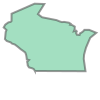

In [9]:
gdf['geometry'][0]

In [10]:
type(gdf['geometry'][0])

shapely.geometry.polygon.Polygon